There are 14 attributes in each case of the dataset. They are:
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's

In [1]:
import pandas as pd

filename = "boston.csv"
data = pd.read_csv(filename)

In [2]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
#it seems as though there aren't any missing values, which will make things a lot easier
#all of the attributes are numerical 
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


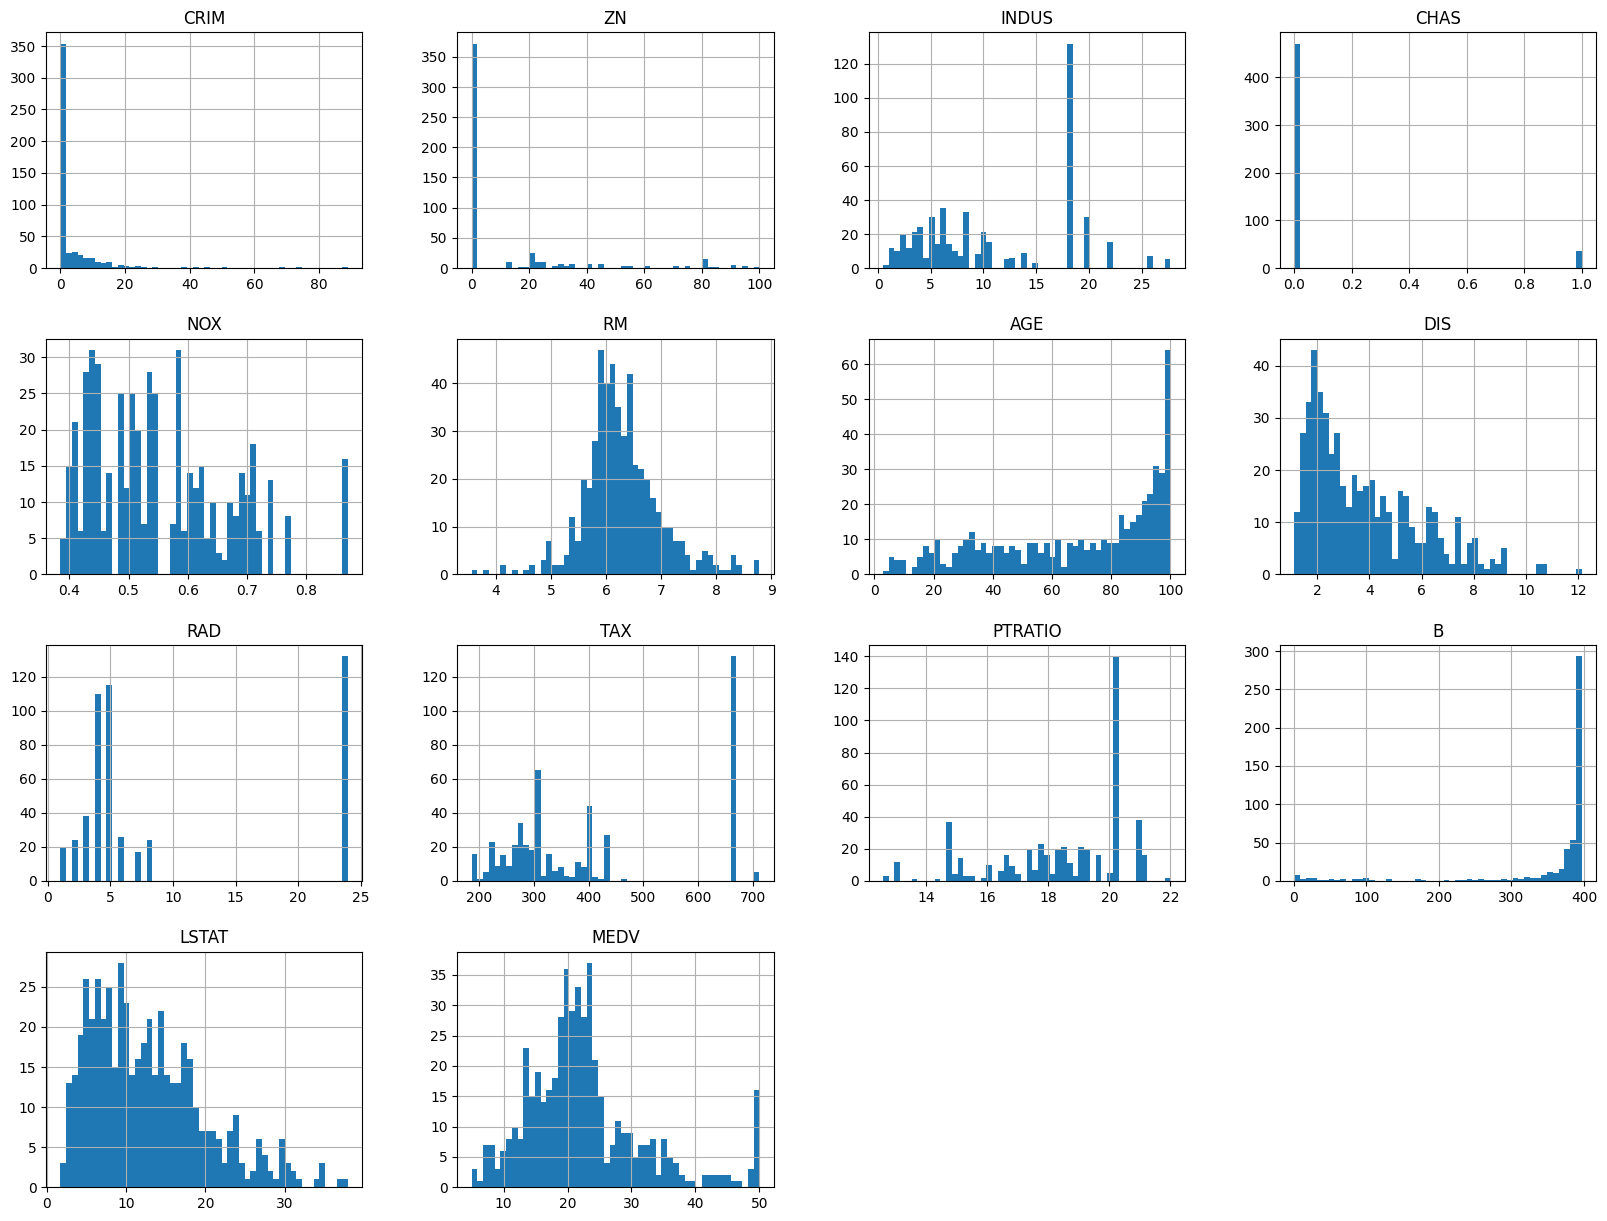

In [5]:
#plotting a historgam to get a feel for the data
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20, 15))
plt.show()

In [6]:
#need to make sure the notebook's output is identical every run
import numpy as np

np.random.seed(42)

In [7]:
#lets create the train and test set
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [8]:
test_set.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296.0,16.6,395.50,9.04,23.6
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254.0,17.6,396.90,3.53,32.4
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711.0,20.1,390.11,18.07,13.6
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305.0,19.2,390.91,5.52,22.8
452,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666.0,20.2,385.09,17.27,16.1


<Axes: >

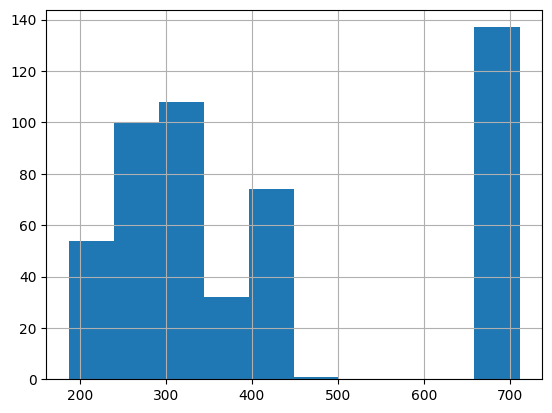

In [9]:
#much of the data is skewed
data['TAX'].hist()

<Axes: >

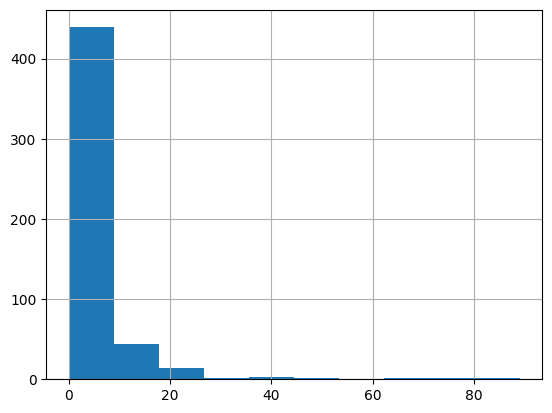

In [10]:
data['CRIM'].hist()

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit

data['crime'] = pd.qcut(data['CRIM'],
                      q=10, labels=False)

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data['crime']):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [12]:
strat_test_set['crime'].value_counts() / len(strat_test_set)

crime
7    0.107843
3    0.107843
5    0.098039
6    0.098039
0    0.098039
2    0.098039
8    0.098039
1    0.098039
4    0.098039
9    0.098039
Name: count, dtype: float64

In [13]:
data['crime'].value_counts() / len(data)
#good enough

crime
0    0.100791
3    0.100791
1    0.100791
5    0.100791
7    0.100791
9    0.100791
2    0.098814
4    0.098814
6    0.098814
8    0.098814
Name: count, dtype: float64

In [14]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('crime', axis=1, inplace=True)

In [15]:
#making a copy of training set for further exploration
data_explore = strat_train_set.copy()

In [16]:
#making a correlation matrix
corr_matrix = data_explore.corr()

In [17]:
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.681100
ZN         0.338244
B          0.308793
DIS        0.241402
CHAS       0.172549
AGE       -0.366290
RAD       -0.370259
CRIM      -0.384071
NOX       -0.429662
TAX       -0.452288
INDUS     -0.466711
PTRATIO   -0.479690
LSTAT     -0.733027
Name: MEDV, dtype: float64

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='INDUS', ylabel='MEDV'>,
        <Axes: xlabel='PTRATIO', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='INDUS', ylabel='RM'>,
        <Axes: xlabel='PTRATIO', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='INDUS', ylabel='ZN'>,
        <Axes: xlabel='PTRATIO', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='INDUS'>,
        <Axes: xlabel='RM', ylabel='INDUS'>,
        <Axes: xlabel='ZN', ylabel='INDUS'>,
        <Axes: xlabel='INDUS', ylabel='INDUS'>,
     

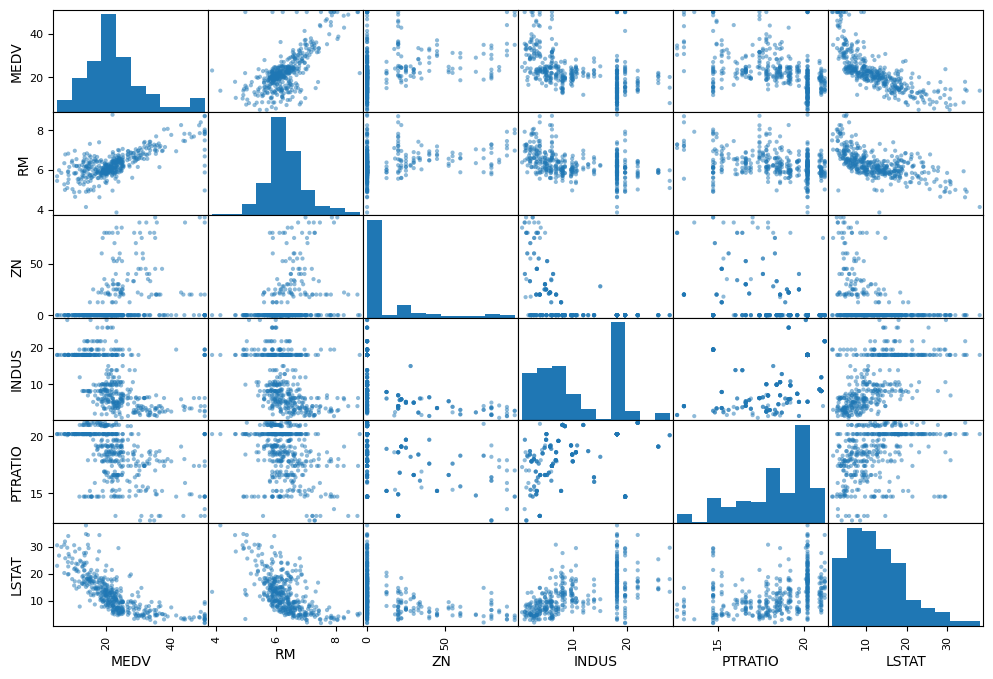

In [18]:
#better visualization with a graph

from pandas.plotting import scatter_matrix

attributes = ['MEDV', 'RM', 'ZN', 'INDUS', 'PTRATIO', 'LSTAT']
scatter_matrix(data_explore[attributes], figsize=(12,8))

<Axes: xlabel='RM', ylabel='MEDV'>

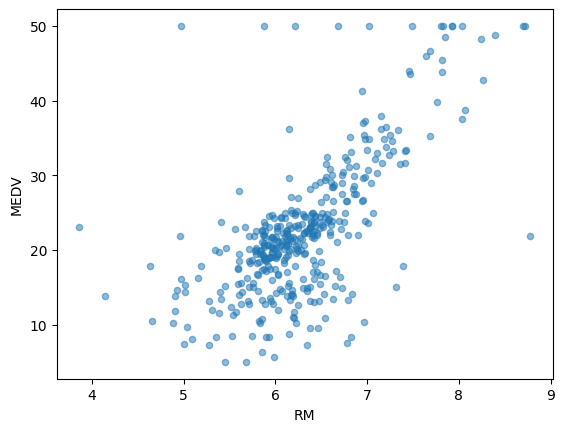

In [19]:
#most promising seems to be rooms (RM)
data_explore.plot(kind="scatter", x="RM", y="MEDV", alpha=0.5)

In [20]:
#noticable cap at 50,000, but lets see if we can create some more meaningful attrtibutes 
data_explore['Industrial_Activity'] = data_explore['NOX'] * data_explore['INDUS']
data_explore['Socio_Econ_Index'] = (data_explore['LSTAT'] + data_explore['PTRATIO'] + data_explore['B']) / 3
data_explore['ENV_Quality'] = (data_explore['NOX'] + data_explore['CRIM']) / 2

In [21]:
corr_matrix = data_explore.corr()

In [22]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV                   1.000000
RM                     0.681100
ZN                     0.338244
B                      0.308793
Socio_Econ_Index       0.246659
DIS                    0.241402
CHAS                   0.172549
AGE                   -0.366290
RAD                   -0.370259
CRIM                  -0.384071
ENV_Quality           -0.387710
NOX                   -0.429662
TAX                   -0.452288
INDUS                 -0.466711
Industrial_Activity   -0.478576
PTRATIO               -0.479690
LSTAT                 -0.733027
Name: MEDV, dtype: float64

In [23]:
data = strat_train_set.drop('MEDV', axis=1)
data_labels = strat_train_set['MEDV'].copy()

In [24]:
data_explore['MEDV'].max()

50.0

In [25]:
#handling the cap in MEDV at 50000 (or 50 with the current scale)
#creating a censoring indicator 
#data_explore['MEDV_Capped'] = (data_explore['MEDV'] == 50.0).astype(int)

#data_explore.head()

In [26]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import mode

class AutoCappedValueTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, cap_percentile_threshold=95, cap_mode_threshold=0.1):
        """
        cap_percentile_threshold: percentile used to detect caps (both upper and lower)
        cap_mode_threshold: the proportion threshold to consider a value as a cap based on its frequency
        """
        self.cap_percentile_threshold = cap_percentile_threshold
        self.cap_mode_threshold = cap_mode_threshold
        self.detected_caps_ = {}

    def fit(self, X, y=None):
        # Detect caps
        for col in X.columns:
            column_data = pd.Series(X[col])
            low_cap = column_data.quantile((100 - self.cap_percentile_threshold) / 100)
            high_cap = column_data.quantile(self.cap_percentile_threshold / 100)
            mode_value, mode_count = mode(column_data)
            mode_proportion = mode_count[0] / len(column_data)

            # Check for high cap
            if mode_proportion > self.cap_mode_threshold and mode_value[0] >= high_cap:
                self.detected_caps_[col] = {'cap_value': mode_value[0], 'direction': 'upper'}
            # Check for low cap
            elif mode_proportion > self.cap_mode_threshold and mode_value[0] <= low_cap:
                self.detected_caps_[col] = {'cap_value': mode_value[0], 'direction': 'lower'}
        return self

    def transform(self, X):
        X_trans = X.copy()
        for col, cap_info in self.detected_caps_.items():
            if cap_info['direction'] == 'upper':
                X_trans[col + '_CAPPED'] = (X_trans[col] >= cap_info['cap_value']).astype(int)
            elif cap_info['direction'] == 'lower':
                X_trans[col + '_CAPPED'] = (X_trans[col] <= cap_info['cap_value']).astype(int)
        return X_trans


In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('cap_transformer', AutoCappedValueTransformer()),
    ('std_scaler', StandardScaler()),
])

data_prepared = num_pipeline.fit_transform(data_explore)

/var/folders/83/qx33zxpd4cjb39h49x9vvynr0000gn/T/ipykernel_22168/3822024113.py:22: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_value, mode_count = mode(column_data)
/var/folders/83/qx33zxpd4cjb39h49x9vvynr0000gn/T/ipykernel_22168/3822024113.py:22: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to Tr

In [28]:
data_prepared.shape

(404, 22)

In [29]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(data_prepared, data_labels)

LinearRegression()

In [30]:
#seeing performance
from sklearn.metrics import mean_squared_error

data_predictions = lin_reg.predict(data_prepared)
lin_mse = mean_squared_error(data_labels, data_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1.4019328455179665e-14

In [31]:
#pretty good rmse, but lets use cross-validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, data_prepared, data_labels,
                        scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)

In [32]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation", scores.std())
    
display_scores(lin_rmse_scores)

Scores: [1.73470912e-14 1.53811999e-14 1.51619792e-14 1.19837876e-14
 2.18715627e-14 1.55120050e-14 2.68106333e-14 1.45462097e-14
 4.30349712e-14 2.23730187e-14]
Mean: 2.040224583866038e-14
Standard Deviation 8.662758487363134e-15


In [33]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(data_prepared, data_labels)

RandomForestRegressor(random_state=42)

In [34]:
data_predictions = forest_reg.predict(data_prepared)
forest_mse = mean_squared_error(data_labels, data_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.07477641590928143

In [35]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, data_prepared, data_labels, 
                               scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.46892024 0.21155637 0.22254613 0.12496136 0.11463082 0.13335638
 0.1473148  0.20491535 0.17537481 0.25123838]
Mean: 0.20548146515741372
Standard Deviation 0.09800573422090032


In [36]:
#some overfitting on both lin_reg and forest_reg since score on training set is much lower than on validation set

In [42]:
# Feature engineering for training data
X_train = strat_train_set.drop("MEDV", axis=1)  # Assuming MEDV is the target variable
y_train = strat_train_set["MEDV"].copy()

X_train['Industrial_Activity'] = X_train['NOX'] * X_train['INDUS']
X_train['Socio_Econ_Index'] = (X_train['LSTAT'] + X_train['PTRATIO'] + X_train['B']) / 3
X_train['ENV_Quality'] = (X_train['NOX'] + X_train['CRIM']) / 2

# Assuming num_pipeline is your preprocessing pipeline
X_train_prepared = num_pipeline.fit_transform(X_train)

# Train the model
lin_reg = LinearRegression()
lin_reg.fit(X_train_prepared, y_train)

# Feature engineering for test data
X_test = strat_test_set.drop("MEDV", axis=1)  # Assuming MEDV is the target variable
y_test = strat_test_set["MEDV"].copy()

X_test['Industrial_Activity'] = X_test['NOX'] * X_test['INDUS']
X_test['Socio_Econ_Index'] = (X_test['LSTAT'] + X_test['PTRATIO'] + X_test['B']) / 3
X_test['ENV_Quality'] = (X_test['NOX'] + X_test['CRIM']) / 2

# Apply the same transformations to the test set
X_test_prepared = num_pipeline.transform(X_test)

# Predictions and evaluation
final_predictions = lin_reg.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print("Final RMSE:", final_rmse)



Final RMSE: 3.793234356937325


/var/folders/83/qx33zxpd4cjb39h49x9vvynr0000gn/T/ipykernel_22168/3822024113.py:22: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_value, mode_count = mode(column_data)
/var/folders/83/qx33zxpd4cjb39h49x9vvynr0000gn/T/ipykernel_22168/3822024113.py:22: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to Tr

In [43]:
# 95% confidence that the RMSE is in between a certain range
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, 
                        loc=squared_errors.mean(), 
                        scale = stats.sem(squared_errors)))

array([3.01955114, 4.43391076])